In [1]:
%matplotlib inline
%load_ext autoreload      
%autoreload 2     

import sys
import copy
import numpy as np
from numpy import sqrt, pi, exp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

sys.path.append("../")
from qo_simulator_1ph import QOsimulator_1ph as QOsimulator
sys.path.append("../lib/")
from _qo_simulator import _QOsimulator
path_to_qo_object = "../qo_object/"
sys.path.append(path_to_qo_object)
from qo_object import QOobject, Mirror, BeamSplitter, PolarizationRotator, PhaseShifter
path_to_qo_beam = "../qo_beam/"
sys.path.append(path_to_qo_beam)
from qo_beam import QObeam

In [2]:
## set parameters
N       = (256, 256)   # number of grid in the x and y directions
L       = (10*pi, 10*pi) # Size of space in the x and y dicrections
##
x0      = 0.5*L[0]-14.0 # initial position x
y0      = 0.5*L[1]-8.0  # initial position y
kx0     = 10.0   # center of initial k-space distribution (k_x axis)
ky0     = 0.0   # center of initial k-space distribution (k_y axis)
sigma_x = 2.0
sigma_y = 2.0
##
dt      = 0.1  # timestep
t_max   = 48
n_divide= 5

In [3]:
beam = QObeam(N, L, x0, y0, kx0, ky0, sigma_x, sigma_y)

# Create QOobject

----> optimizing omega_j for Beamsplitter...
----> Result: omega_j=0.307831, diff_prob=0.000000



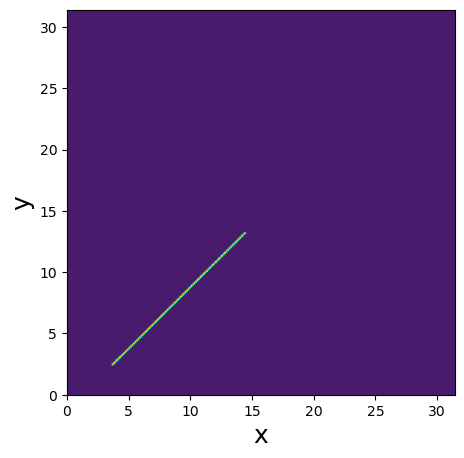

In [4]:
BS1 = BeamSplitter(N, L, 64 +10, 54 +10, size=1, angle=45, beam=beam, Lexp=5*pi)
BS1.show()

----> optimizing omega_j for Beamsplitter...
----> Result: omega_j=0.307831, diff_prob=0.000000



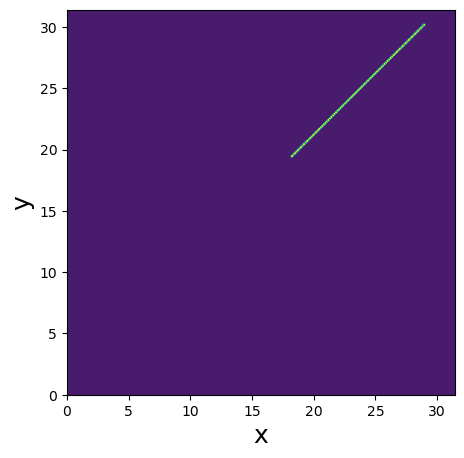

In [5]:
BS2 = BeamSplitter(N, L, 192, 202, size=1, angle=45, beam=beam, Lexp=5*pi)
BS2.show()

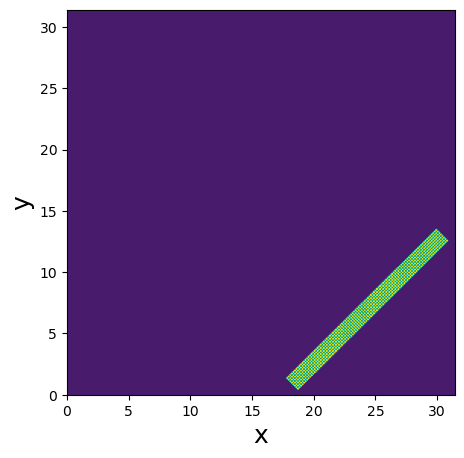

In [6]:
M1 = Mirror(N, L, 199, 57, size=1, angle=45, beam=beam)
M1.show()

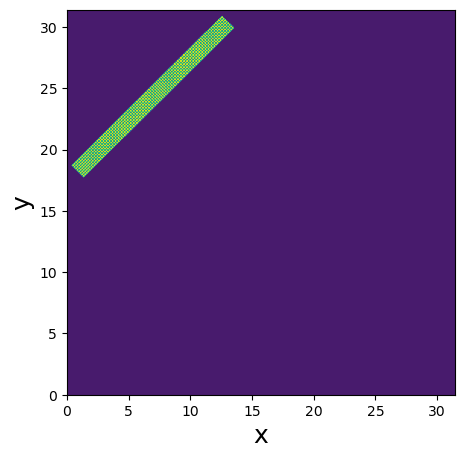

In [7]:
M2 = Mirror(N, L, 58, 198, size=1, angle=45, beam=beam)
M2.show()

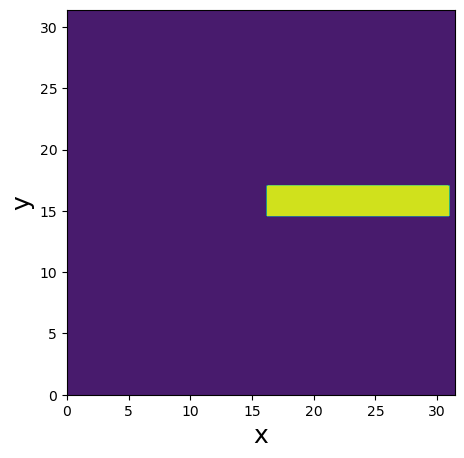

In [8]:
Dj=M1.Dj
omj=0.2*M1.omega_j
layer=20
PS = QOobject(int(960*layer/8), int(layer), Dj, omj, N, L, center_nx=int(N[0]/4*3), center_ny=int(N[1]/2), angle=0)
PS.show()

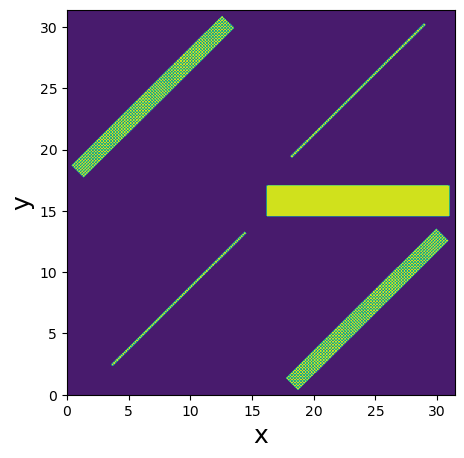

In [9]:
QOobject.show_all([BS1,BS2,M1,M2,PS])

# Mainroutine

In [10]:
interval_of_cf = np.linspace(0,0.0008,11)

def gen_show_tlist(t_max, n_divide):
    tlist = []
    for i in range(int(t_max/dt)+1):
        t = i*dt
        tlist.append(t)
    res = [ elem[0] for elem in np.array_split(tlist, n_divide)]
    res.append(tlist[-1])
    return  res

def show_info(qosim,  phi, t):
    print("#------- t=", round(t,3))
    prob_ph=phi.ph.probability()
    prob_A = phi.A.probability()
    print("|c_ph|^2, |c_A|^2 = ",  round(prob_ph,5), round(prob_A,5) )
    print("sum |c|^2=", round(prob_ph+prob_A, 5))
    # Energy
    eF=qosim.calc_EF(phi)
    eA=qosim.calc_EA(phi)
    eI=qosim.calc_EI(phi)
    econst=qosim.calc_Econst()
    print("E_F, E_A, E_I, econst =", round(eF,5), round(eA,5), round(eI,5), round(econst,5))
    print("Total energy = ", round(eF + eA + eI + econst, 5))
    print("Total energy - econst = ", round(eF + eA + eI,5))
    ## Check sum of photon number density
    density = phi.ph.partial_density(_in="r")
    mat = np.zeros((qosim.N[0], qosim.N[1]))
    for _obj in qosim.objects:
        for idx in _obj.atom_pos_indices:
            mat[idx[0],idx[1]] = 1
    im, title = qosim.show(density, t, levels=interval_of_cf, extend="both")
    plt.contour(qosim.qosim_1ph.x, qosim.qosim_1ph.y, mat.T, colors="gray")            
    # plt.title("t=%.2f" % t, fontsize=18)
    # plt.savefig("fig/MZ_"+str(int(t))+".eps", bbox_inches="tight")
    plt.show()
    return im, title

show_tlist = gen_show_tlist(t_max, n_divide=n_divide)

#------- t= 0
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 0.0 -10374.17825
Total energy =  -10364.172
Total energy - econst =  10.00625


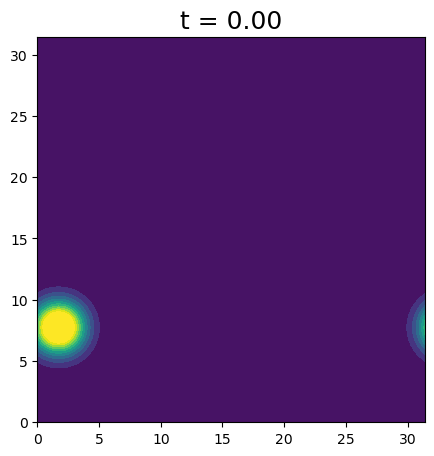

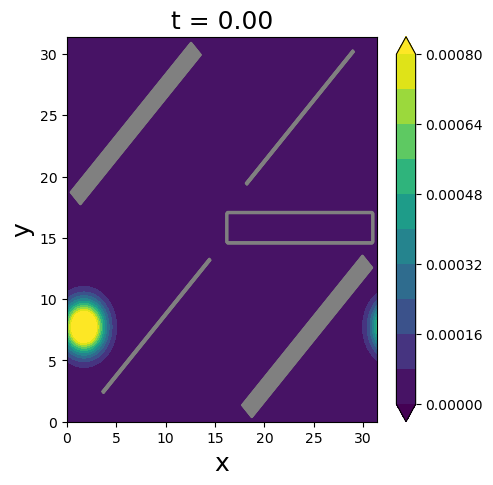

(<matplotlib.contour.QuadContourSet at 0x133e56b90>,
 Text(0.5, 1.01, 't = 0.00'))

In [11]:
objects=[BS1, BS2, M1, M2, PS]
qosim = QOsimulator(N, L, dt, beam = beam, objects=objects)
init_phi = qosim.gen_initial_state()
show_info(qosim, init_phi, t=0)

#------- t= 0.0
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 0.0 -10374.17825
Total energy =  -10364.172
Total energy - econst =  10.00625


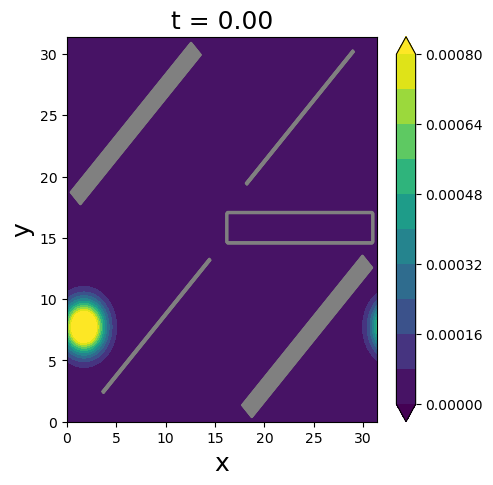

#------- t= 9.7
|c_ph|^2, |c_A|^2 =  0.9946 0.0054
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 9.89919 0.00364 0.09996 -10374.17825
Total energy =  -10364.17546
Total energy - econst =  10.00279


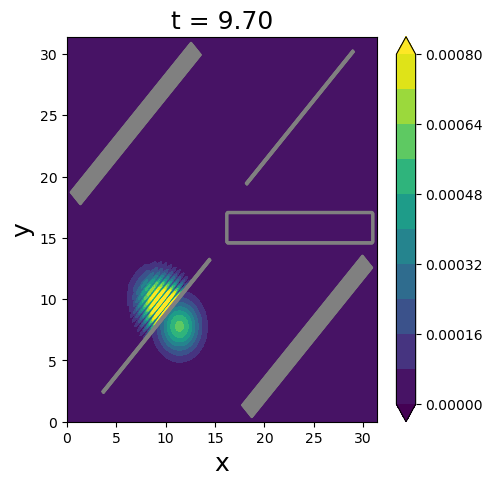

#------- t= 19.3
|c_ph|^2, |c_A|^2 =  0.99495 0.00505
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 9.95462 0.05039 -0.00025 -10374.17825
Total energy =  -10364.17349
Total energy - econst =  10.00476


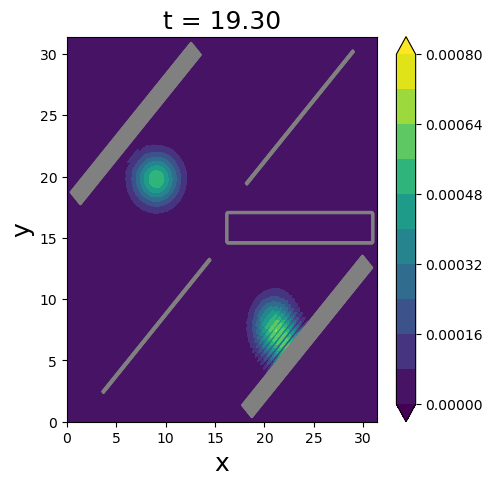

#------- t= 28.9
|c_ph|^2, |c_A|^2 =  0.97461 0.02539
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 9.56684 0.07817 0.36718 -10374.17825
Total energy =  -10364.16606
Total energy - econst =  10.01219


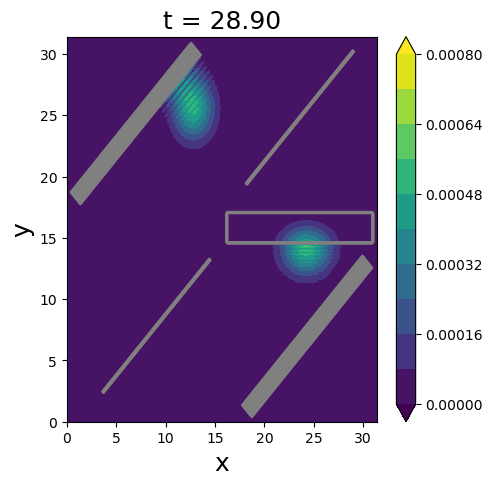

#------- t= 38.5
|c_ph|^2, |c_A|^2 =  0.99368 0.00632
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 9.87968 0.00478 0.11782 -10374.17825
Total energy =  -10364.17597
Total energy - econst =  10.00228


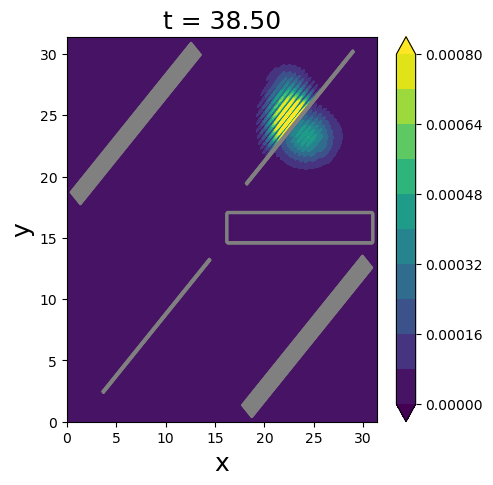

#------- t= 48.0
|c_ph|^2, |c_A|^2 =  0.9949 0.0051
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 9.95278 0.04937 0.00267 -10374.17825
Total energy =  -10364.17344
Total energy - econst =  10.00481


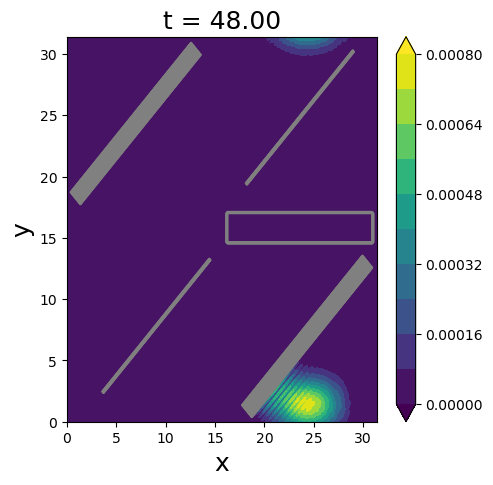

CPU times: user 12 s, sys: 275 ms, total: 12.3 s
Wall time: 12.3 s


In [12]:
%%time
for i in range(int(t_max/dt)+1):
    t = i*dt
    if i == 0:
        phi = copy.deepcopy(init_phi)
    else:
        phi = qosim.suzuki_trotter_step(phi)
    ##
    if t in show_tlist:
        im, title = show_info(qosim, phi, t)    

# Phase shift dependence

In [13]:
def mat_above(N,h,w):
    mat = np.zeros(N)
    for i in range(N[0]):
        for j in range(N[1]):
            if i>N[0]/2-h and j>i+10:
                mat[i,j] = 1.0
    for i in range(N[0]):
        for j in range(N[1]):
            if i>N[0]/2-h and j<N[1]/2-w:
                mat[i,j] = 1.0
    return mat

def mat_right(N,h,w):
    mat = np.zeros(N)
    for i in range(N[0]):
        for j in range(N[1]):
            if i>N[0]/2-h and j>N[1]/2-w and j<i+10:
                mat[i,j] = 1.0
    for i in range(N[0]):
        for j in range(N[1]):
            if i<N[0]/2-h and j>N[1]/2-w:
                mat[i,j] = 1.0
    return mat

CPU times: user 1min 38s, sys: 1.78 s, total: 1min 40s
Wall time: 1min 40s


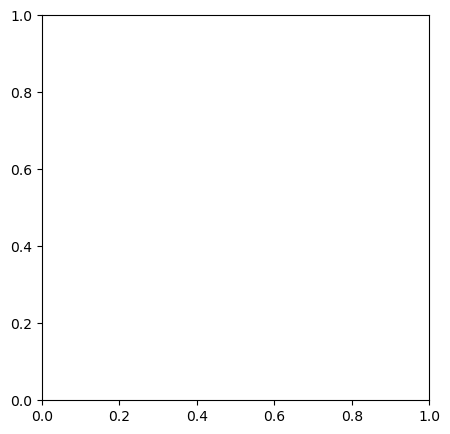

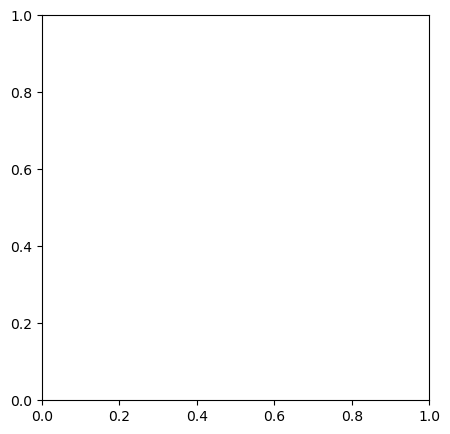

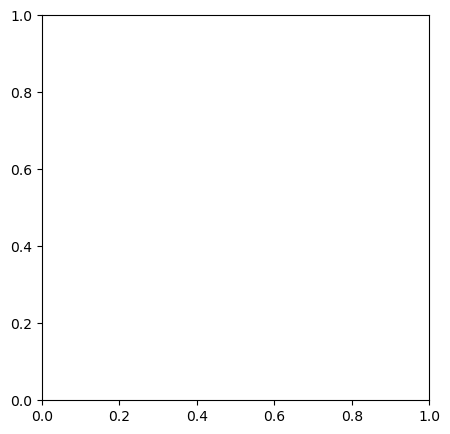

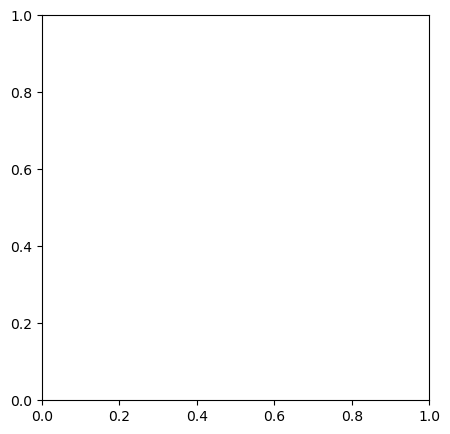

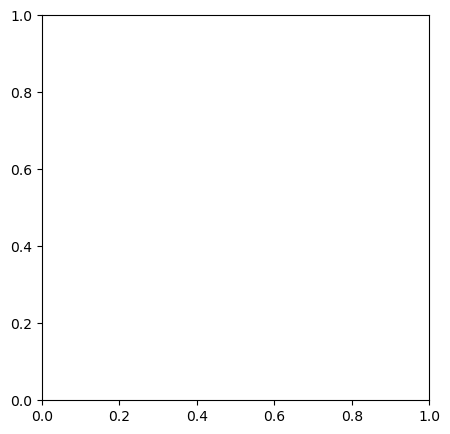

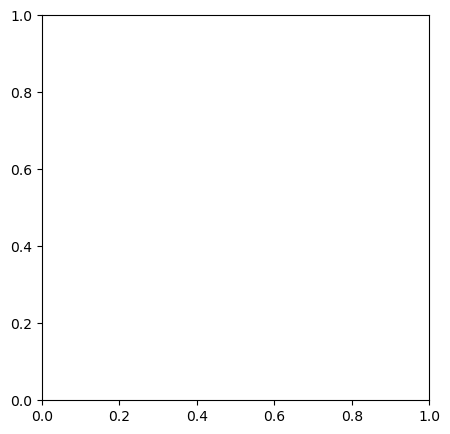

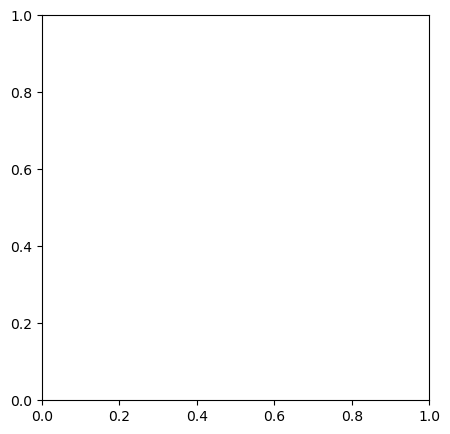

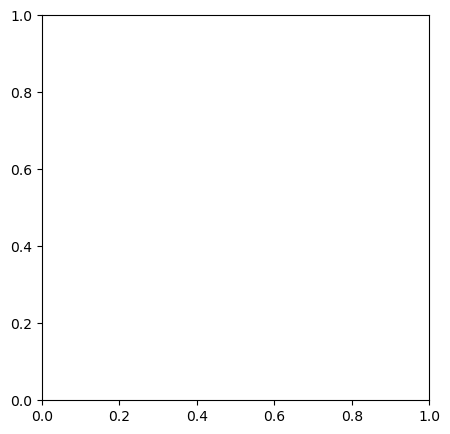

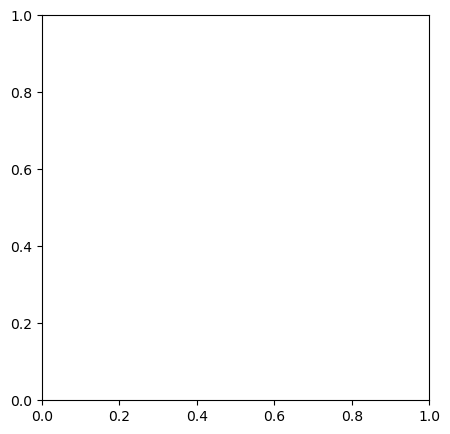

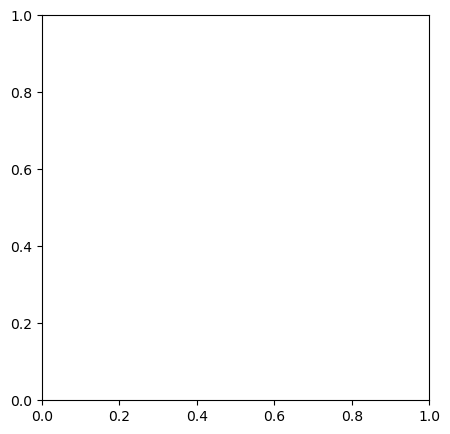

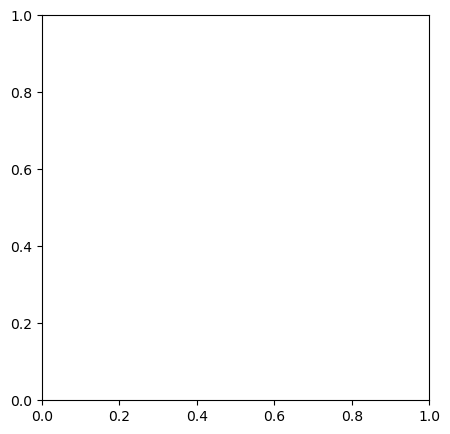

In [14]:
%%time
layers=np.arange(0,20+1,2)
p_right=[]
for layer in layers:
    Dj=M1.Dj
    omj=0.2*M1.omega_j
    if layer==0:
        objects=[BS1, BS2, M1, M2]
    else:
        PS = QOobject(int(960*layer/8), int(layer), Dj, omj, N, L, center_nx=int(N[0]/4*3), center_ny=int(N[1]/2), angle=0)
        objects=[BS1, BS2, M1, M2, PS]
    ## initialization
    qosim = QOsimulator(N, L, dt, beam = beam, objects=objects)
    init_phi = qosim.gen_initial_state()
    ## time evolution
    for i in range(int(t_max/dt)+1):
        t = i*dt
        if i == 0:
            phi = copy.deepcopy(init_phi)
        else:
            phi = qosim.suzuki_trotter_step(phi)
    ## evaluation
    density = phi.ph.partial_density(_in="r")
    mat = mat_right(N,0,0)
    masked_density = mat*density
    p_right.append(np.sum(masked_density))

In [15]:
from scipy import interpolate

In [16]:
fit_right = interpolate.interp1d(layers, p_right, kind="cubic")

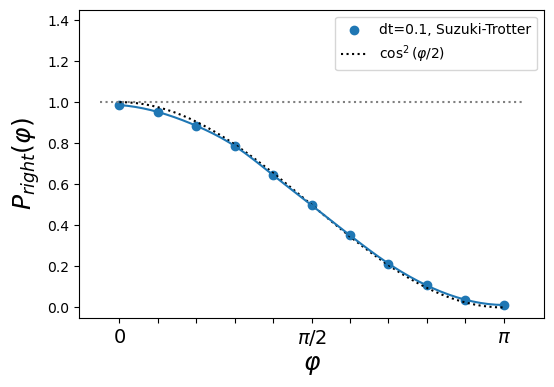

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(layers, p_right, label="dt=0.1, Suzuki-Trotter")
##
x=np.linspace(0,20)
plt.plot(x,np.cos(x/20*pi/2)**2, color="k", ls=":", label=r"$\cos^2(\varphi/2)$")
plt.plot(x,fit_right(x))
##
plt.hlines(1.0, -1, 21, color="gray", ls=":")
plt.ylim(-0.05,1.45)
plt.xlabel(r"$\varphi$", fontsize=18)
plt.ylabel(r"$P_{right}(\varphi)$", fontsize=18)
plt.xticks(layers, [r"$0$","","","","",r"$\pi/2$","","","","",r"$\pi$"], fontsize=14)
plt.legend(loc="upper right")
# plt.savefig("fig/MZ_phase_shift.eps", bbox_inches="tight")